# Module 10: CRISP-DM and Python Libraries for Data Science
March 17, 2021

Last time we discussed the basics of resources on the web, how to access remote resources (files, REST services), how to handle XML files, and how to scrape content form the HTML representation of websites.

Today we have a closer look the CRISP-DM reference model for approaching data analysis problems, and at some of the most popular Python libraries for data science applications: Pandas (continued), NumPy and Matplotlib. They all belong to the SciPy collection of libraries for mathematics, science and engineering (https://www.scipy.org/). Always keep in mind that in the lecture we can only discuss a few selected examples, so refer to the respective online documentation for full reference.

Next time we will have a look into regular expressions, which can be very useful in practice to find patterns in text – not only useful in Python programs!

## Approaching Data Analysis Problems: CRISP-DM
How to approach complex data analysis problems? There are of course different ways to do this, one of the most popular is the Cross-Industry Standard Process for Data Mining. CRISP-DM provides a reference model describing how data mining experts typically proceed to address their problems, and thus gives orientation which steps to perform in a data science project. It divides the process into six major phases as shown in the picture below: 
1. **Business Understanding**: This initial phase focuses on understanding and determining the general project objectives from a “business” or research perspective. Which (research) questions should the data analysis project answer? It also includes the setup of a project plan.
2. **Data Understanding**: This phase is about the familiarization with the available data. This includes to collect, describe, and explore initial data for the project objectives, and also to verify the quality of the data. 
3. **Data Preparation**: This phase is about turning the initial data set into the final data set that will be used for the analysis. Depending on the situation, this might include selecting, cleaning, constructing, integrating and formatting data to make them ready for further processing.
4. **Modeling**: This phase is about selecting the analysis techniques to be used on the data set, the abstract description of the overall computational process (e.g. with UML Activity Diagrams), its implementation (e.g. with Python) and finally execution on the prepared data set. 
5. **Evaluation**: This phase is about critically reviewing the computational model, program and results. Are they correct, and do they achieve the project objectives? If not, the previous phases should be applied again to identify and eliminate the problems. 
6. **Deployment**: This last phase is about the deployment of the final data, process, program, results and project report. Furthermore, it should include making plans for monitoring and maintenance of data and software artifacts, and a review of the complete project.

<img src="img/crisp-dm.png" width="300">
Image by Kenneth Jensen, work based on ftp://public.dhe.ibm.com/software/analytics/spss/documentation/modeler/18.0/en/ModelerCRISPDM.pdf (Figure 1), CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=24930610

If you are interested in reading more about CRISP-DM: The "CRISP-DM 1.0 - Step-by-Step Data Mining Guide" (maintained by IBM and freely available online at ftp://ftp.software.ibm.com/software/analytics/spss/support/Modeler/Documentation/14/UserManual/CRISP-DM.pdf) is the official reference for the method. 

## Python Libraries for Data Science
In the following we have a look at some of the most important libraries for data science in Python, and discuss some important concepts related to them. Note that we cannot discuss all libraries in detail in this course, and that in the lecture we can only discuss a few selected examples, so refer to the respective online documentation for full reference.

### Pandas
The most important things to know about Pandas we have already covered a while ago: how to use Pandas to read content from CSV files, the data frame and series data structures, indexing operations and basic plotting and statistics methods for data frames and series. Please refer to the Pandas documentation at http://pandas.pydata.org/pandas-docs/stable/ for further details, as we cannot cover the library in depth in this course. In this lecture we only address two other important aspects: handling of missing data and concatenating/joining tables with Pandas.

#### Handling Missing Data

For various reasons it can happen that data are missing in a data frame. They might, for example, already have been missing in the input CSV file due to measurement faults, or have become unavailable because of computations that were not able to return a (good) result.
In Pandas the value ```np.nan``` (technically of type ```float```) is the primarily used value for representing missing data. This can look as follows:

In [1]:
import pandas as pd

df = pd.read_csv("data/table-with-missing-data.csv", sep=",")
print(df)

     name   age  height
0   Alice  29.0   160.0
1     Bob  45.0   172.0
2   Cindy  63.0     NaN
3  Dennis   NaN   197.0
4     Eve  42.0   171.0
5     NaN  75.0   200.0
6    Gina   NaN   158.0
7   Harry  35.0   180.0


Note that the value ```None```, should it occur during computations, is usually also interpreted as ```NaN```, and generally the values to be interpreted as missing can be configured in the Python options. This should be done with care, however.  

By default, Pandas operations simply ignore ```NaN``` values. That is, they simply carry out the computation on the available data in the data frame or series, and/or propagate ```NaN``` values if a meaningful result cannot be derived. For example:


In [2]:
print(df.describe())
print(df["age"]+1)

             age      height
count   6.000000    7.000000
mean   48.166667  176.857143
std    17.486185   16.577380
min    29.000000  158.000000
25%    36.750000  165.500000
50%    43.500000  172.000000
75%    58.500000  188.500000
max    75.000000  200.000000
0    30.0
1    46.0
2    64.0
3     NaN
4    43.0
5    76.0
6     NaN
7    36.0
Name: age, dtype: float64


If such behavior is not wanted, the data frame or series can be manipulated accordingly before applying the operations. One option is to remove rows or columns with missing data completely by using the ```dropna()``` function. The following example shows how to drop all rows where any data are missing, and how to drop all rows where age or height data are missing:

In [3]:
print(df.dropna())
print(df.dropna(subset=["age", "height"]))

    name   age  height
0  Alice  29.0   160.0
1    Bob  45.0   172.0
4    Eve  42.0   171.0
7  Harry  35.0   180.0
    name   age  height
0  Alice  29.0   160.0
1    Bob  45.0   172.0
4    Eve  42.0   171.0
5    NaN  75.0   200.0
7  Harry  35.0   180.0


Another possibility is to replace the ```NaN``` values by other/better values:

In [4]:
print(df.fillna(0))
print(df.fillna(value={"age":0, "height":0}))
print(df.fillna(value={"age":df["age"].mean(), \
                       "height":df["height"].mean()}))

     name   age  height
0   Alice  29.0   160.0
1     Bob  45.0   172.0
2   Cindy  63.0     0.0
3  Dennis   0.0   197.0
4     Eve  42.0   171.0
5       0  75.0   200.0
6    Gina   0.0   158.0
7   Harry  35.0   180.0
     name   age  height
0   Alice  29.0   160.0
1     Bob  45.0   172.0
2   Cindy  63.0     0.0
3  Dennis   0.0   197.0
4     Eve  42.0   171.0
5     NaN  75.0   200.0
6    Gina   0.0   158.0
7   Harry  35.0   180.0
     name        age      height
0   Alice  29.000000  160.000000
1     Bob  45.000000  172.000000
2   Cindy  63.000000  176.857143
3  Dennis  48.166667  197.000000
4     Eve  42.000000  171.000000
5     NaN  75.000000  200.000000
6    Gina  48.166667  158.000000
7   Harry  35.000000  180.000000


In some cases also Pandas’ ```interpolate()``` function can be used to come up with values to fill in for missing data. Of course, replacing missing data with values should always be done with great care, as there is a risk of producing distorted or even wrong results when adding data to a data set. Generally, the choice how to handle missing data depends on the specifics of the concrete case, but it is good to know about the different options.

#### Concatenating and Joining Tables

When working with data frames, often the question arises how to combine two or more of them into one. The following illustrates the most important ways to do that.

The easiest case of combining two data frames into one is **concatenation**. It is possible if the two tables have the same columns, but a different set of rows, or if they have the same rows, but different sets of columns. In the former case, they can simply be concatenated vertically, on top of each other, and in the other case horizontally, or next to each other.  The following example illustrates how to do that with pandas, simply creating parts of the data frame above that are then concatenated:


In [6]:
import pandas as pd

df = pd.read_csv("data/table-with-missing-data.csv", sep=",")

three_more_rows = pd.DataFrame(data=\
    {"name":["Ines","Joe","Kathy"],"age":[51,18,34],\
    "height":[178,185,168]})
print(three_more_rows)

df_concatenated = pd.concat([df, three_more_rows], axis=0)
print(df_concatenated)

    name  age  height
0   Ines   51     178
1    Joe   18     185
2  Kathy   34     168
     name   age  height
0   Alice  29.0   160.0
1     Bob  45.0   172.0
2   Cindy  63.0     NaN
3  Dennis   NaN   197.0
4     Eve  42.0   171.0
5     NaN  75.0   200.0
6    Gina   NaN   158.0
7   Harry  35.0   180.0
0    Ines  51.0   178.0
1     Joe  18.0   185.0
2   Kathy  34.0   168.0


Note that the ```concat()``` method does not assign new index values by default. Setting the parameter ```ignore_index=True``` will cause it to re-index, too.

Adding a new column to the data frame can be done with the same method, but using the other axis. For example:

In [7]:
one_more_column = pd.Series([62,70,74,91,65,80,45,95],name="weight")
df_concatenated = pd.concat([df,one_more_column], axis=1)
print(df_concatenated)

     name   age  height  weight
0   Alice  29.0   160.0      62
1     Bob  45.0   172.0      70
2   Cindy  63.0     NaN      74
3  Dennis   NaN   197.0      91
4     Eve  42.0   171.0      65
5     NaN  75.0   200.0      80
6    Gina   NaN   158.0      45
7   Harry  35.0   180.0      95


Another, and sometimes not-so-easy case is the **joining** of data from different tables that do not come with the same set of rows or columns. In this case, one or more join keys need to be identified that are present in both files and can thus be used to associate the different data items to each other. Sometimes two columns are named the same and do in fact contain the same kind of data. Then it is easy to see that they might be a good key. Here is an example with two simple data frames that both have a key column and can thus easily be joined with merge:

In [8]:
left = pd.DataFrame({'key': ['key1', 'key2', 'key3', 'key4'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})  

right = pd.DataFrame({'key': ['key1', 'key3', 'key4', 'key2'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

join = pd.merge(left, right, on='key')
print(join)

    key   A   B   C   D
0  key1  A0  B0  C0  D0
1  key2  A1  B1  C3  D3
2  key3  A2  B2  C1  D1
3  key4  A3  B3  C2  D2


In other cases, it is not so obvious from the name of the column, but if there are two columns with different names that contain the same kind of data, they can also be used as join keys:

In [9]:
left = pd.DataFrame({'key': ['key1', 'key2', 'key3', 'key4'],
                    'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3']})  

right = pd.DataFrame({'ID': ['key5', 'key3', 'key4', 'key2'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

join = pd.merge(left, right, left_on="key",right_on="ID")
print(join)

    key   A   B    ID   C   D
0  key2  A1  B1  key2  C3  D3
1  key3  A2  B2  key3  C1  D1
2  key4  A3  B3  key4  C2  D2


Apparently, only the rows whose keys appear in both data frames are contained in the result. This is the default behavior and corresponds to a so-called inner join. It is also possible to use all data from one or both tables in the joined table, and let the missing values in the rows simply be filled with ```NaN``` values. Those are then called left outer join (if everything from the left table is used, but only the matching keys from the right), right outer join (everything from the right), or outer join (every-thing from both). See the following examples for illustration:

In [10]:
inner_join = pd.merge(left, right, left_on="key", right_on="ID", how='inner')
print(inner_join)

left_outer_join = pd.merge(left, right, left_on="key", right_on="ID", how='left')
print(left_outer_join)

right_outer_join = pd.merge(left, right, left_on="key",right_on="ID", how='right')
print(right_outer_join)

outer_join = pd.merge(left, right, left_on="key",right_on="ID", how='outer')
print(outer_join)


    key   A   B    ID   C   D
0  key2  A1  B1  key2  C3  D3
1  key3  A2  B2  key3  C1  D1
2  key4  A3  B3  key4  C2  D2
    key   A   B    ID    C    D
0  key1  A0  B0   NaN  NaN  NaN
1  key2  A1  B1  key2   C3   D3
2  key3  A2  B2  key3   C1   D1
3  key4  A3  B3  key4   C2   D2
    key    A    B    ID   C   D
0  key2   A1   B1  key2  C3  D3
1  key3   A2   B2  key3  C1  D1
2  key4   A3   B3  key4  C2  D2
3   NaN  NaN  NaN  key5  C0  D0
    key    A    B    ID    C    D
0  key1   A0   B0   NaN  NaN  NaN
1  key2   A1   B1  key2   C3   D3
2  key3   A2   B2  key3   C1   D1
3  key4   A3   B3  key4   C2   D2
4   NaN  NaN  NaN  key5   C0   D0


For full reference regarding table merging operations with pandas, see https://pandas.pydata.org/pandas-docs/stable/merging.html.

### NumPy

The NumPy library (http://www.numpy.org/) has been designed to provide specific support for numerical mathematics in Python. In particular, it provides a data structure for n-dimensional arrays/matrices (the ndarray) and operations for working with it. Note that Pandas, itself focusing on functionality for data science applications, has been built on top of NumPy.

Here is a small basic NumPy example that shows some of many different ways to create ndarrays:

In [11]:
import numpy as np
a = np.array([[1,5,6],[6,7,6],[5,4,3]])
b = np.zeros((3,3))
c = np.ones((3,3))
d = np.identity(3)
print(a)
print(b)
print(c)
print(d)

[[1 5 6]
 [6 7 6]
 [5 4 3]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Indexing etc. basically works as with lists, data frames and other collection data structures that we have seen before. Note, however, that ndarrays are homogeneously typed, that is, all contained elements must be of the same type, and that they are usually fixed-size, that is, all rows in a dimension must be of the same length. Also appending new rows or columns to ndarrays is not as easy as with the aforementioned data types, so ideally they are created directly with the size and number of dimensions needed, and values filled in later in the program if needed. The advantage of ndarrays is that numerical operations on large matrices run much faster on them then on the dynamic collection data structures.

Python’s standard arithmetic operations can be used on ndarrays, and will be executed elementwise. For example:


In [12]:
print(a+c)
print(a*a)
print((a-c)<=b)

[[2. 6. 7.]
 [7. 8. 7.]
 [6. 5. 4.]]
[[ 1 25 36]
 [36 49 36]
 [25 16  9]]
[[ True False False]
 [False False False]
 [False False False]]


For matrix-specific operations, own operators and attributes have been defined, for example for matrix multiplication and transposition:

In [13]:
print(a@a) 
print(a.T)

[[ 61  64  54]
 [ 78 103  96]
 [ 44  65  63]]
[[1 6 5]
 [5 7 4]
 [6 6 3]]


Here is now an example (largely taken from https://www.geeksforgeeks.org/check-given-matrix-is-magic-square-or-not/) that actually does something more useful with ndarrays: A “magic square” is a nxn matrix all of whose row sums, column sums and the sums of the two diagonals are the same. The function ```is_magic(matrix)``` in the program below checks if a ndarray represents a magic square:

In [14]:
import numpy as np

def is_magic(matrix):
    # check if matrix is nxn
    dim = matrix.shape
    if len(dim)!=2 or dim[0] != dim[1]: return False
    N = dim[0]        
    
    # calculate the sum of the prime diagonal 
    s = 0
    for i in range(0, N): 
        s = s + matrix[i][i]      
        
    # calculate the sum of the other diagonal
    s2 = 0
    for i in range(0,N):
        s2 = s2 + matrix[i][N-i-1]
        
    if (s != s2): return False
    
    # For sums of Rows
    for i in range(0, N):
        rowSum = 0;      
        for j in range(0, N): 
            rowSum += matrix[i][j]   
            
        # check if every row sum is equal to prime diagonal sum 
        if (rowSum != s): 
            return False
        
    # For sums of Columns 
    for i in range(0, N): 
        colSum = 0
        for j in range(0, N): 
            colSum += matrix[j][i]   
            
        # check if every column sum is equal to prime diagonal sum
        if (s != colSum):
            return False
        
    # if all yes, return true
    return True

# test program:
A = np.array([[4,9,2],
             [3,5,7],
             [8,1,6]])
B = np.array([[3,9,2],
              [4,5,7],
              [8,1,6]])

print(f"Is A magic? {is_magic(A)}")
print(f"Is B magic? {is_magic(B)}")


Is A magic? True
Is B magic? False


### Matplotlib

Matplotlib (https://matplotlib.org/) is Python's 2D plotting library. A number of plotting functions in other libraries, for example the Pandas plotting functions, are actually wrappers around the respective Matplotlib functions. Here is a first simple example with random data:


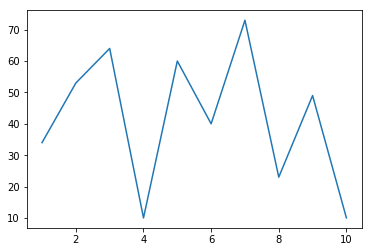

In [15]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9,10]
y = [34,53,64,10,60,40,73,23,49,10]

plt.plot(x,y)
plt.show()

First the ```matplotlib.pyplot``` module (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) is imported and given the shorter name ```plt```. Then two lists x and y of same length are created. X contains a sequence of ascending numbers, and y the same number of random values. The simplest plot is to plot x against y, which is done with the ```plt.plot(x,y)``` statement. ```plt.show()``` then shows the plot.

Instead of or in addition to displaying the plots to the user, they can also be saved into raster or vector files for later use with the ```savefig``` function. See the following code for an example that also uses further parameters of the plot function to change the color and add markers to the plotted line:


In [ ]:
plt.plot(x,y, color="r", marker="o")
plt.savefig("img/plot.png")
plt.savefig("img/plot.pdf")

Resulting Files:

![](img/plot_png_file.png)![](img/plot_pdf_file.png)

As another example, consider again the Dutch municipalities data set that we worked with earlier. We can create histograms of population numbers with the following code:

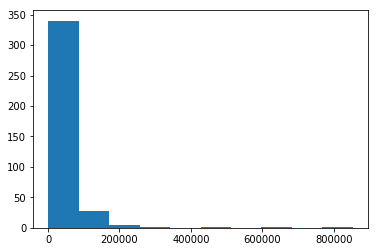

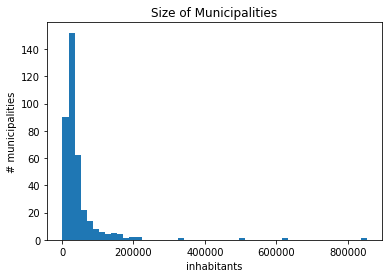

In [20]:
df = pd.read_csv("data/dutch_municipalities.csv", sep="\t")
plt.hist(df["population"])
plt.show()

plt.hist(df["population"], bins=50)
plt.title("Size of Municipalities")
plt.xlabel("inhabitants")
plt.ylabel("# municipalities")
plt.show() 

In principle the functions in Matplotlib all work according to the same principles, but it is always crucial to refer to their specific documentation and understand their parameters in order to use them proficiently in own context. If you would like to see more examples, you can for example go to https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py for further introductory examples of 2D plotting,  https://pythonprogramming.net/matplotlib-intro-tutorial/ for video lectures on Matplotlib, or https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html for visualization using the Pandas package.

## Exercise: Analysis of the McDonald’s Menu (★★★★☆)
This exercise is a variation of one that Dr. Adrien Melquiond (Utrecht Bioinformatics Center) developed in the scope of another Python course. It uses the Pandas and NumPy libraries to analyze the dataset in the file `mcdonalds_menu.csv`, which provides a nutrition analysis of every menu item on the US McDonald's menu (including breakfast, beef burgers, chicken and fish sandwiches, fries, salads, soda, coffee and tea, milkshakes, and desserts). These data have been scraped from the McDonald's website. The assignment is basically about exploring how much fat and other nutrients contained in McDonald’s food. 

Write a program that reads the content of the file into a data frame, displays simple descriptive statistics about the numerical values in the data frame, and then answers the following questions (you might need Google’s help for some, and number 2 is probably the most difficult one).

Please use Quarterfall to submit and check your answers. 

### 1. What do we have on the menu? 
How many different items do we have on the menu? Using a barplot, display the number of items per category. Which category is the most represented in this menu?

The output should look something like:

![](img/mcdo_q1.png)

### 2. What is the most fatty item for each category?
Background information: When it comes to fat, trans fats are really the ones to avoid. Trans fat is a byproduct of a process called hydrogenation that is used to turn healthy oils into solids and to prevent them from becoming rancid. It increases the amount of harmful LDL cholesterol in the bloodstream. Cholesterol can be either good (HDL) or bad (LDL) but chances are slim that we are talking about the good one here. Saturated fat is not necessarily bad, but diet rich in saturated fat can drive up total cholesterol, with increased risk of clogged arteries. Unsaturated fat are not reported in this table.

First, use a boxplot to show the spread of 'Total Fat (% Daily Value)' values per category. 

Then create a subset data frame, called `grp_by_category`, that lists per category the maximal amount of 'Total Fat (% Daily Value)','Trans Fat','Saturated Fat (% Daily Value)' and 'Cholesterol (% Daily Value)'. Merge the data frames `menu` and `grp_by_category` and create a mask to select the items that correspond to the maximal 'Total Fat (% Daily Value)'. Be careful, you may end up with more than one fattest item per category. Repeating the same process, extract now the fattest item in 'Trans fat' (make sure to select only items with Trans fat > 0). Sort them by decreasing order of Trans fat, display the resulting data frame.

The output should look something like:

![](img/mcdo_q2.png)

### 3. Is there anything healthy on the menu?
Search for items with 0 'Trans fat' and 'Cholesterol (% Daily Value)', and maximum 20 'Sugars' and 'Total Fat (% Daily Value)'. Sort the healthy items per calories in ascending order. Remove from this healthy data frame all the drinks (beverages, coffee & tea).

The output should look something like:

![](img/mcdo_q3.png)

### 4. What are the 10 items that have the highest content of Vitamin C?
Citrus fruits are the high source of Vitamin C. For adults, the recommended dietary reference intake for vitamin C is 65 to 90 milligrams (mg) a day, and the upper limit is 2,000 mg a day. Using pandas' function `pivot_table()`, make a barplot that shows the 'Vitamin C (% Daily Value)' for the ten items that contain the highest amount of vitamin C.

The output should look something like:

![](img/mcdo_q4.png)

### 5. What is the best “muscle food” on the menu?
Let's assume we want to get a lot of proteins but as little sugar as possible. Identify the top three items based on their protein/sugars ratio.

The output should look something like:

![](img/mcdo_q5.png)

### 6. How do the nutrition features compare to each other?
Let's finally take a look at how one feature feeds into the other. Using `pandas.plotting.scatter_matrix()`, we can plot multiple scatterplots and get a quick feel for the data. Plot a multiple scatterplot for all the following columns in your dataframe: 'Calories', 'Total Fat', 'Saturated Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Sugars', 'Protein'. What can you observe from the (anti)correlations of the nutritional metrics?

The output should look something like:

![](img/mcdo_q6.png)

## Extras
The Anaconda website offers a number of “Learning Python For Data Science” cheat sheets at https://www.anaconda.com/learning-python-data-science-cheat-sheets/. Print out those that could be useful for quick reference when working on your projects. In particular, that might be the cheat sheets about Python basics https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf, Numpy basics https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf and Pandas basics https://s3.amazonaws.com/
assets.datacamp.com/blog_assets/PandasPythonForDataScience.pdf, but there are some more that you might find interesting.